In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_diamonds = pd.read_csv('diamonds.csv')
print(df_diamonds.shape) # (53940, 11)
print(df_diamonds.dtypes)
df_diamonds.head()

(53940, 11)
Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df_diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
# On recherhe les données manquantes
df_diamonds[df_diamonds.isnull().any(axis=1)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


In [5]:
df_diamonds.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
def estimate_diamond_shape(row):
    x, y, z = row['x'], row['y'], row['z']
    if x == 0 or y == 0 or z == 0:
        return 'Unknown'

    xy_ratio = x / y if y != 0 else np.nan
    xz_ratio = x / z if z != 0 else np.nan
    yz_ratio = y / z if z != 0 else np.nan

    # Round: très symétrique
    if abs(x - y) < 0.05 and 1.5 < xz_ratio < 1.7:
        return 'Round'
    # Princess: carré, profond
    elif abs(x - y) < 0.05 and 1.45 < xz_ratio < 1.55:
        return 'Princess'
    # Cushion: carré mais plus aplati
    elif abs(x - y) < 0.1 and 1.35 < xz_ratio < 1.45:
        return 'Cushion'
    # Asscher: carré, peu profond
    elif abs(x - y) < 0.05 and 1.25 < xz_ratio < 1.35:
        return 'Asscher'
    # Heart: proche d’un rond mais difficile à reconnaître
    elif abs(x - y) < 0.05 and 1.55 < xz_ratio < 1.65:
        return 'Heart'
    # Emerald: rectangulaire, peu profond
    elif xy_ratio > 1.2 and 1.25 < xz_ratio < 1.35:
        return 'Emerald'
    # Radiant: allongé, profondeur moyenne
    elif xy_ratio > 1.1 and 1.35 < xz_ratio < 1.45:
        return 'Radiant'
    # Oval: légèrement allongé
    elif 1.1 <= xy_ratio <= 1.3:
        return 'Oval'
    # Marquise: très allongé
    elif xy_ratio > 1.3:
        return 'Marquise'
    # Pear: très allongé, mais plus plat
    elif xy_ratio > 1.4 and xz_ratio < 1.5:
        return 'Pear'
    else:
        return 'Other'

df_diamonds['shape'] = df_diamonds.apply(estimate_diamond_shape, axis=1)

In [7]:
print(df_diamonds.shape) # (53940, 11)
print(df_diamonds.dtypes)
df_diamonds.head()

(53940, 11)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
shape       object
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z,shape
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Round
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Other
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Other
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Round
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Round


### Analyse des données
---

carat = Le poid en carat

cut = C'est la coupe (forme) du diamant

color = C'est la couleur du diamant

clarity = C'est la pureté du diamant

depth = C'est la taille (hauteur) du diamant

table = C'est la grande facette plate supérieure du diamant, située au centre de la couronne

price = C'est le prix du diamant. C'est ce que notre modèle devrat estimer

x, y, z = Ces données nous permettrons de calculer le volume du diamant

shape = forme du diamant

Text(0.5, 1.0, 'Distribution of Diamond Shapes')

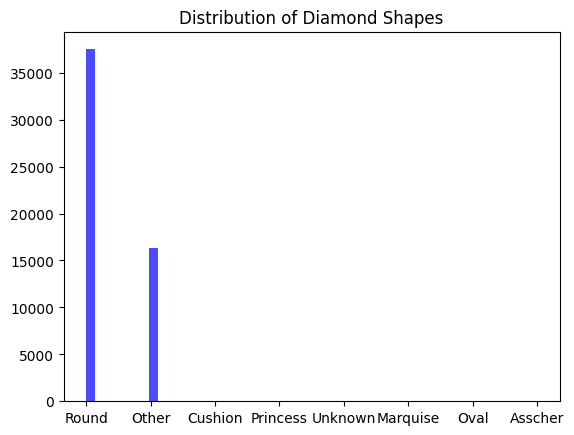

In [8]:
plt.hist(df_diamonds['shape'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Diamond Shapes')

Text(0.5, 1.0, 'Distribution of Diamond Colors')

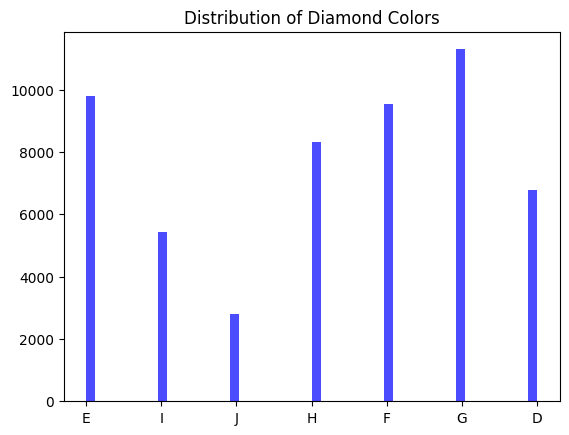

In [9]:
plt.hist(df_diamonds['color'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Diamond Colors')

C:\Users\yfour\AppData\Local\Temp\ipykernel_13784\3578763449.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Carat vs Price by Shape')

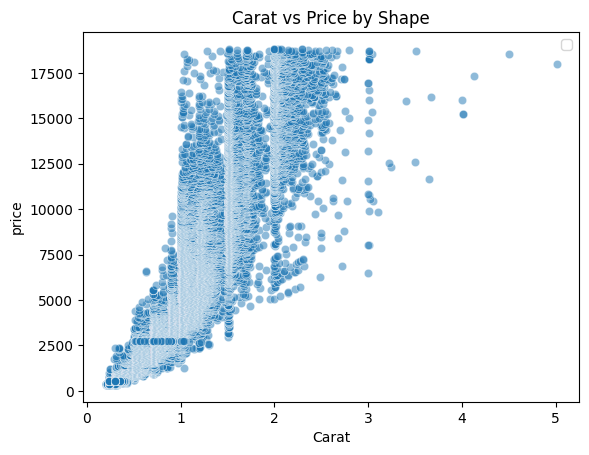

In [10]:
sns.scatterplot(data=df_diamonds, x='carat', y='price', alpha=0.5)
plt.xlabel('Carat')
plt.legend()
plt.title('Carat vs Price by Shape')

Text(0.5, 1.0, 'Average Price by Cut with Standard Deviation')

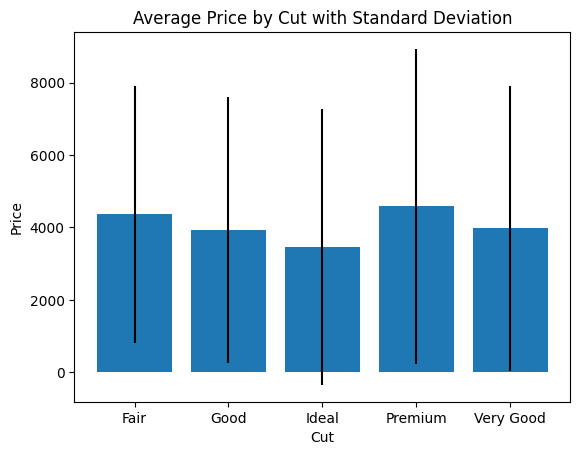

In [11]:
df_diamonds_grpby = df_diamonds.groupby('cut').agg({'price': ['mean', 'std', 'count']}).reset_index()
# df_diamonds_grpby
plt.bar(df_diamonds_grpby['cut'], df_diamonds_grpby['price']['mean'], yerr=df_diamonds_grpby['price']['std'])
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Average Price by Cut with Standard Deviation')